In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [25]:
s = titles[(titles.title == "Superman") | (titles.title == 'Batman')]
a = s.groupby(['title', 'year']).size()
a1 = a.unstack('title').fillna(0)
a1

title,Batman,Superman
year,,
1943,1.0,0.0
1948,0.0,1.0
1973,0.0,1.0
1978,0.0,1.0
1980,0.0,1.0
1987,0.0,1.0
1989,1.0,0.0
1997,0.0,1.0


In [43]:
z = a1.Superman - a1.Batman
z[z>0].count()

6

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [40]:
len(z[z<0]) #.count()

2

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [44]:
p = cast[(cast.type == 'actor') | (cast.type == 'actress')]
q =p.groupby(['year', 'type']).size()
q

year  type   
1894  actor           2
      actress         1
1900  actor           2
1905  actor           1
1906  actor          14
      actress         3
1907  actor           5
1908  actor          29
      actress        13
1909  actor           3
1910  actor          44
      actress        24
1911  actor         135
      actress        63
1912  actor         240
      actress       148
1913  actor         656
      actress       346
1914  actor        2244
      actress      1153
1915  actor        3456
      actress      2029
1916  actor        4904
      actress      2868
1917  actor        5264
      actress      3097
1918  actor        4924
      actress      2834
1919  actor        5039
      actress      2858
                  ...  
2008  actress     35116
2009  actor       75619
      actress     41745
2010  actor       73809
      actress     39565
2011  actor       81055
      actress     44827
2012  actor       85932
      actress     46390
2013  actor       89962
  

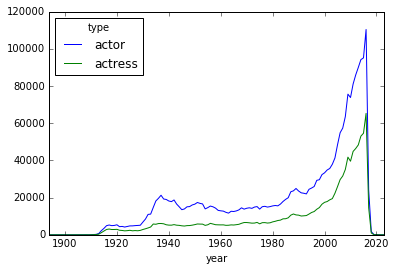

In [46]:
q.unstack('type').fillna(0).plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

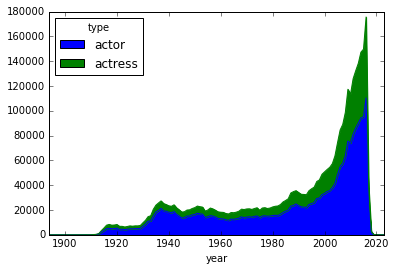

In [47]:
q.unstack('type').fillna(0).plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

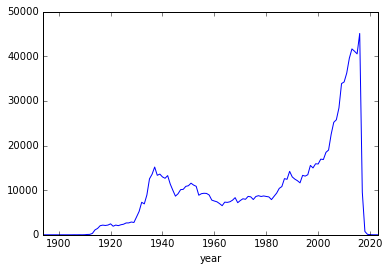

In [63]:
r = q.unstack('type').fillna(0)
r['diff']=r.actor - r.actress
(r.actor - r.actress).plot()

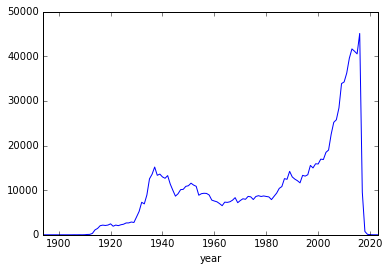

In [67]:
r['diff'].plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

In [70]:
cast[]

type,actor,actress,diff,frac
year,,,,
1894,2.0,1.0,1.0,2.0
1900,2.0,0.0,2.0,1.0
1905,1.0,0.0,1.0,1.0
1906,14.0,3.0,11.0,4.0
1907,5.0,0.0,5.0,1.0
1908,29.0,13.0,16.0,14.0
1909,3.0,0.0,3.0,1.0
1910,44.0,24.0,20.0,25.0
1911,135.0,63.0,72.0,64.0


In [74]:
r['frac']= (r.actor) / (r.actor + r.actress)
r

type,actor,actress,diff,frac
year,,,,
1894,2.0,1.0,1.0,0.666667
1900,2.0,0.0,2.0,1.000000
1905,1.0,0.0,1.0,1.000000
1906,14.0,3.0,11.0,0.823529
1907,5.0,0.0,5.0,1.000000
1908,29.0,13.0,16.0,0.690476
1909,3.0,0.0,3.0,1.000000
1910,44.0,24.0,20.0,0.647059
1911,135.0,63.0,72.0,0.681818


(0, 1)

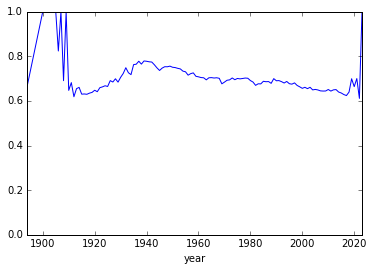

In [76]:
r['frac'].plot().set_ylim(0,1)

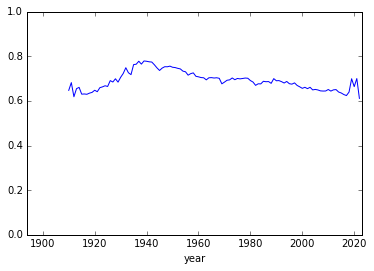

In [77]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

In [92]:
c

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN
1908,29.0,13.0
1909,3.0,NaN
1910,44.0,24.0
1911,135.0,63.0


(0, 1)

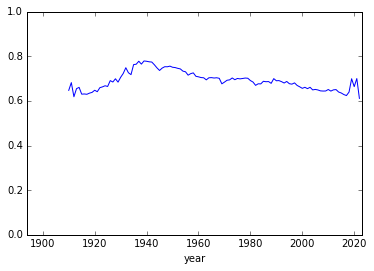

In [93]:
c1 = cast[(cast.type == 'actor') | (cast.type == 'actress')]
c1 = c1.groupby(['year', 'type']).size()
c1 = c1.unstack('type')
c1['frac'] = ((c1.actor) / (c1.actor + c1.actress))
c1['frac'].plot().set_ylim(0,1)

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

(0, 1)

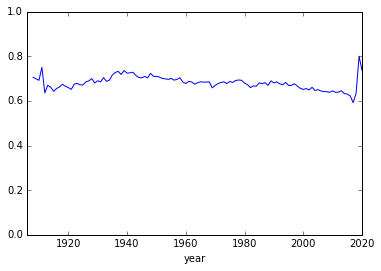

In [100]:
c2 = cast[(cast.n >= 2)] 
c2 = c2.groupby(['year', 'type']).size()
c2 = c2.unstack('type')
c2['frac']=c2.actor / (c2.actor + c2.actress)
c2['frac'].plot().set_ylim(0,1)

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

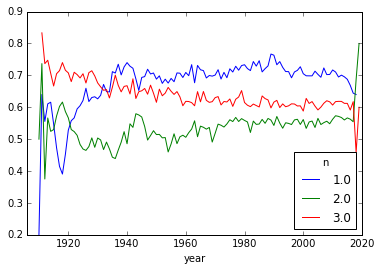

In [143]:
c3 = cast[(cast.n == 1) | (cast.n == 2) | (cast.n == 3)] 
c3 = c3.groupby(['year', 'type', 'n']).size()
c3 = c3.unstack(['type'])
r = ((c3.actor) / (c3.actor + c3.actress))
r
r.unstack('n').plot()